task 8

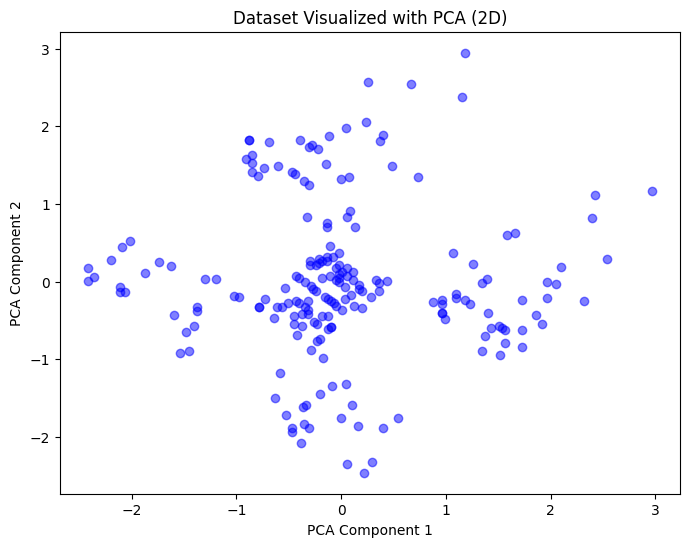

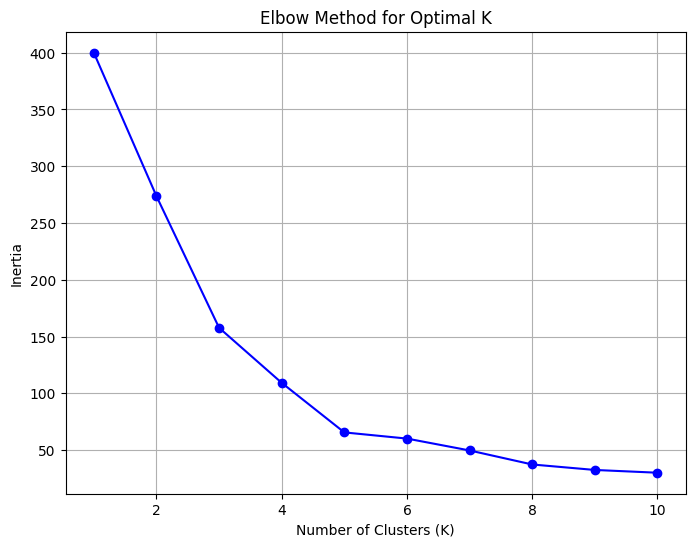

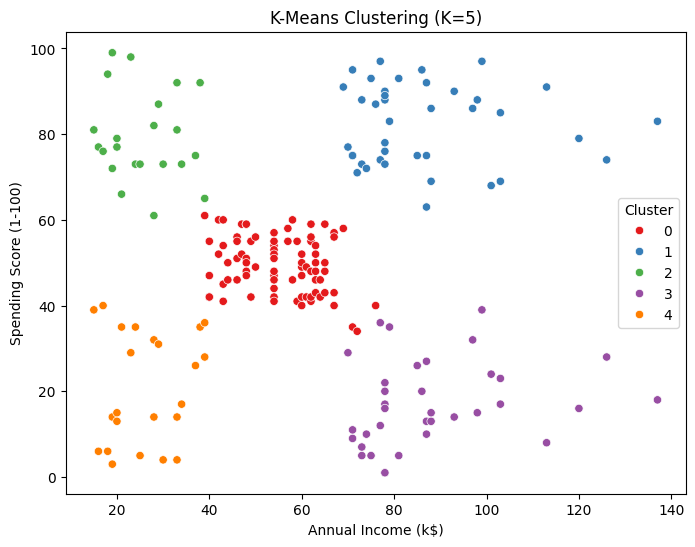

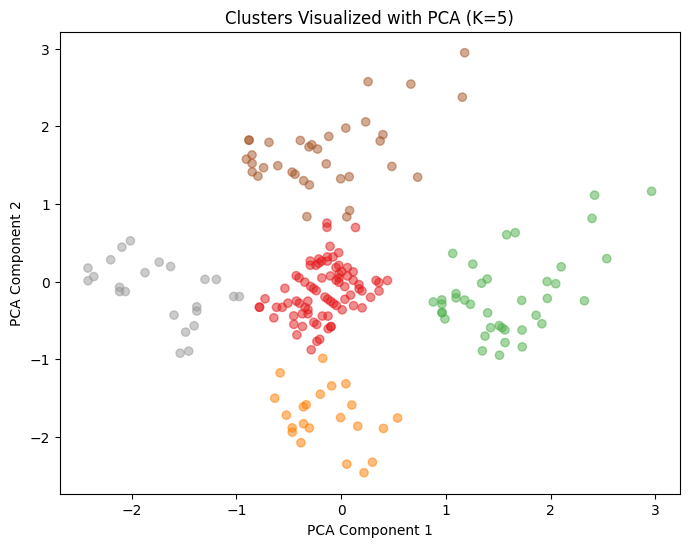

Silhouette Score for K=5: 0.5547
Silhouette Score for K=2: 0.3973
Silhouette Score for K=3: 0.4666
Silhouette Score for K=4: 0.4943
Silhouette Score for K=5: 0.5547
Silhouette Score for K=6: 0.5138
Silhouette Score for K=7: 0.5020
Silhouette Score for K=8: 0.4550
Silhouette Score for K=9: 0.4567
Silhouette Score for K=10: 0.4448


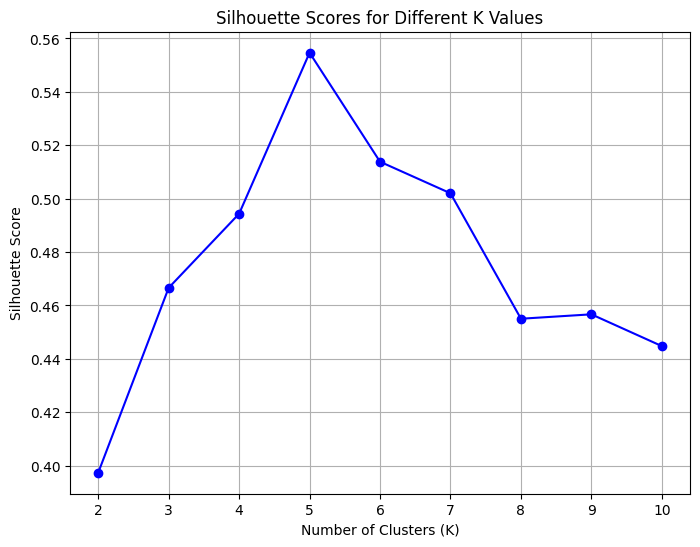

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and visualize dataset (optional PCA for 2D view)
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Select features for clustering (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.title('Dataset Visualized with PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 2: Fit K-Means and assign cluster labels
# Initial K-Means clustering with a default K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
df['Cluster'] = clusters

# Step 3: Use the Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Based on the Elbow plot, let's assume the optimal K is 5 (to be confirmed visually)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Step 4: Visualize clusters with color-coding
# Visualize the clusters using the original features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', data=df)
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Visualize the clusters using PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', alpha=0.5)
plt.title(f'Clusters Visualized with PCA (K={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 5: Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}")

# Optional: Compute silhouette scores for a range of K values to confirm optimal K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(score)
    print(f"Silhouette Score for K={k}: {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()